In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/aci_m.csv")

In [3]:
# 4. Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset before soup:")
print(label_counts)


Label distribution in the sampled dataset before soup:
Label
10    5456
9      539
8      511
11     452
1      230
4      194
6      166
5       21
2       19
3       19
7        8
Name: count, dtype: int64


In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Attack Name'], dtype='object')


In [5]:
df.drop(columns=categorical_cols, inplace=True)


In [6]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [7]:
# Count rows with at least one missing value
missing_rows_count = df.isnull().any(axis=1).sum()
print(missing_rows_count)

0


In [ ]:
# Check for missing values in each column
missing_columns = df.isnull().sum()



In [9]:
df=df.fillna(df.mean())  # Mean

In [10]:
import numpy as np

In [ ]:
def check_infinite_values(df):
    infinite_values = df.isin([np.inf, -np.inf]).sum()
    total_infinite = infinite_values.sum()

    if total_infinite > 0:
        print("Infinite values found in the dataset:")
        print(infinite_values[infinite_values > 0])
    else:
        print("No infinite values found in the dataset.")


check_infinite_values(df)

No infinite values found in the dataset.


In [ ]:
import numpy as np
import pandas as pd


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")





 No missing values remain after preprocessing.


In [13]:
df=df.fillna(df.mean())  # Mean

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

# Separating features and label
features = df.drop(columns=["Label"])  # Drop the label column
label = df["Label"]  # Store the label separately

# Fit and transform the features
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the label column back
df_scaled = pd.concat([features_scaled, label], axis=1)

print("Data after Standard Scaling (Label column excluded from scaling):")
print(df_scaled.head())


Data after Standard Scaling (Label column excluded from scaling):
   Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0  0.439730 -1.161017       0.0      -0.173829         -0.006852   
1  0.442151  1.839099       0.0      -0.202143         -0.018724   
2 -3.861733  1.744000       0.0      -0.202559         -0.018724   
3  0.442151  0.498571       0.0      -0.201678         -0.018724   
4  0.422157  1.066593       0.0      -0.202324         -0.018724   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0           0.001828                   -0.013642                   -0.015026   
1          -0.023069                   -0.013826                   -0.016471   
2          -0.023069                   -0.013826                   -0.016465   
3          -0.023069                   -0.013826                   -0.016471   
4          -0.023069                   -0.013826                   -0.016471   

   Fwd Packet Length Max  Fwd Packet Length 

In [15]:
df=df_scaled

In [16]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [17]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
10    5456
9      539
8      511
11     452
1      230
4      194
6      166
5       21
2       19
3       19
7        8
Name: count, dtype: int64


In [18]:
check_infinite_values(df)

No infinite values found in the dataset.


In [19]:
# Confirm if all NaN values are removed
if df.isnull().sum().sum() == 0:
    print("\n No missing values remain after preprocessing.")
else:
    print("\n Warning: Some missing values still exist after preprocessing.")


 No missing values remain after preprocessing.


In [20]:
# Save the new dataset
df.to_csv("mulf_aci.csv", index=False)

# BALANCING USING SMOTE

In [21]:
df=pd.read_csv("/content/mulf_aci.csv")

In [22]:
label_counts = df["Label"].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
Label
10    5456
9      539
8      511
11     452
1      230
4      194
6      166
5       21
2       19
3       19
7        8
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-24-f10e798c7efd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


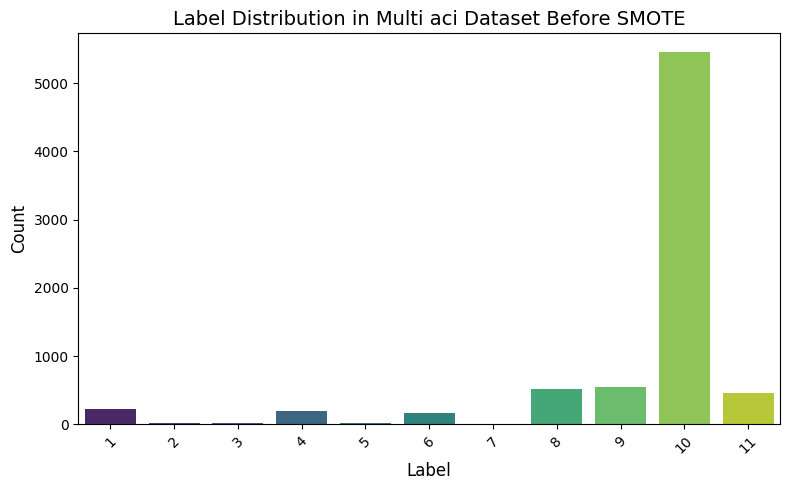

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Multi aci Dataset Before SMOTE", fontsize=14)
plt.xticks(rotation=45)

# Save figure
plt.tight_layout()
plt.savefig('multi_aci_label_distribution_before_smote.png', dpi=800)

# Show plot
plt.show()


In [25]:
!pip install multi_imbalance

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00
  Created wheel for multi_imbalance: filename=multi_imbalance-0.0.14-py3-none-any.whl size=44759 sha256=63cbaf86f886f949fce47cc70626375005a5ec7aeb49f788a0ea39b31333ddf0
  Stored in directory: /root/.cache/pip/wheels/fd/5a/53/f4cf214ad8cd71e56557c4f7c9e699672f13d190dfdf5319d2
Successfully built multi_imbalance


In [26]:
from multi_imbalance.resampling.soup import SOUP

In [27]:
# Calculate the counts of each class in the 'Attack' column
class_counts = df['Label'].value_counts()

# Calculate the mean count across all classes
majority_cutoff = class_counts.mean()

# Separate the majority and minority groups based on the cutoff
majority_classes = class_counts[class_counts > majority_cutoff].index.tolist()
minority_classes = class_counts[class_counts <= majority_cutoff].index.tolist()

# Print the majority and minority groups
print("Majority Classes:")
print(majority_classes)

print("\nMinority Classes:")
print(minority_classes)

Majority Classes:
[10]

Minority Classes:
[9, 8, 11, 1, 4, 6, 5, 2, 3, 7]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7587
[LightGBM] [Info] Number of data points in the train set: 6092, number of used features: 69
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits

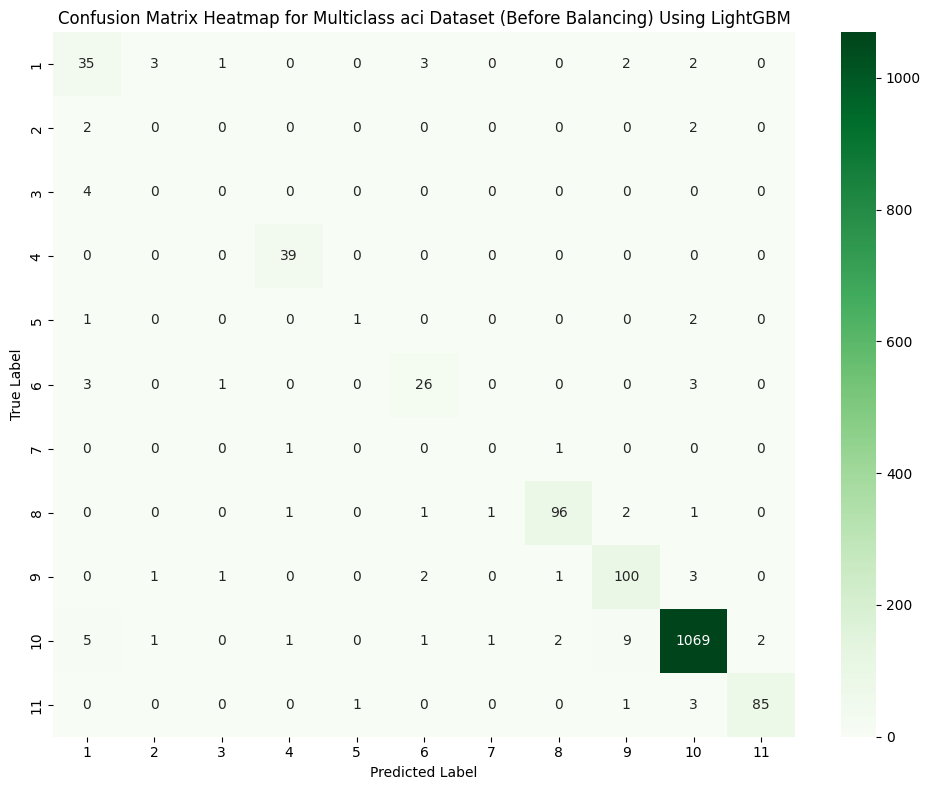

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load your dataset 
# df = pd.read_csv('file.csv')  

# 2. Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train a classifier (LightGBM) on imbalanced data
clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',  # Helps deal with imbalance
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test)

# 6. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 7. Print classification report
print("Classification Report (Before Balancing) - Multiclass:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# 8. Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Multiclass aci Dataset (Before Balancing) Using LightGBM")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('multiclass_aci_confusion_matrix_lightgbm_before_balancing.png', dpi=800)

# Show plot
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17589
[LightGBM] [Info] Number of data points in the train set: 48012, number of used features: 69
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.398062
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Info] Start training from score -2.397833
[LightGBM] [Warning] No further spli

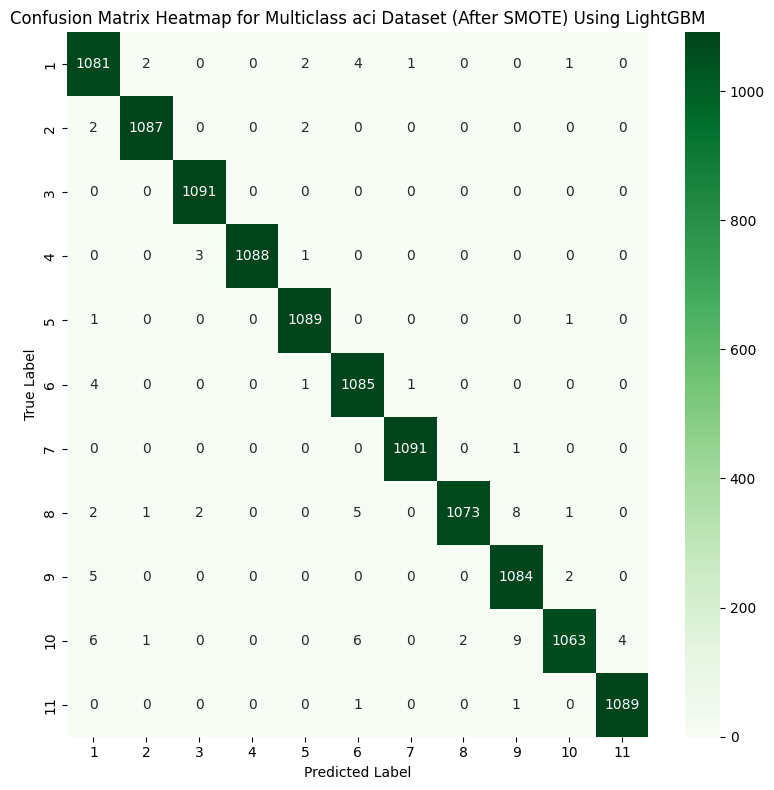

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Load the dataset
df = pd.read_csv("/content/mulf_aci.csv")  

# 2. Split into features and labels
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target label

# 3. Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# 4. Save the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df["Label"] = y_balanced
balanced_df.to_csv("bal_multi_aci.csv", index=False)

# 5. Train-test split (after SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# 6. Train a classifier (LightGBM)
clf = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight=None,  # SMOTE already balanced the dataset
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train, y_train)

# 7. Make predictions
y_pred = clf.predict(X_test)

# 8. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 9. Print classification report
print("Classification Report (After SMOTE - Multiclass) with LightGBM:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# 10. Generate and save heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))  # Keep order of true labels
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Multiclass aci Dataset (After SMOTE) Using LightGBM")
plt.tight_layout()

# Save the confusion matrix figure
plt.savefig('multiclass_aci_confusion_matrix_lightgbm_after_smote.png', dpi=800)

# Show plot
plt.show()


In [30]:
df=pd.read_csv("/content/bal_multi_aci.csv")

In [31]:
# 4. Check label count distribution
label_counts = df["Label"].value_counts()
print("\nLabel distribution in the sampled dataset after SMOTE:")
print(label_counts)


Label distribution in the sampled dataset after SMOTE:
Label
6     5456
10    5456
1     5456
9     5456
8     5456
11    5456
4     5456
5     5456
7     5456
2     5456
3     5456
Name: count, dtype: int64


<ipython-input-32-9577bba1e8c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


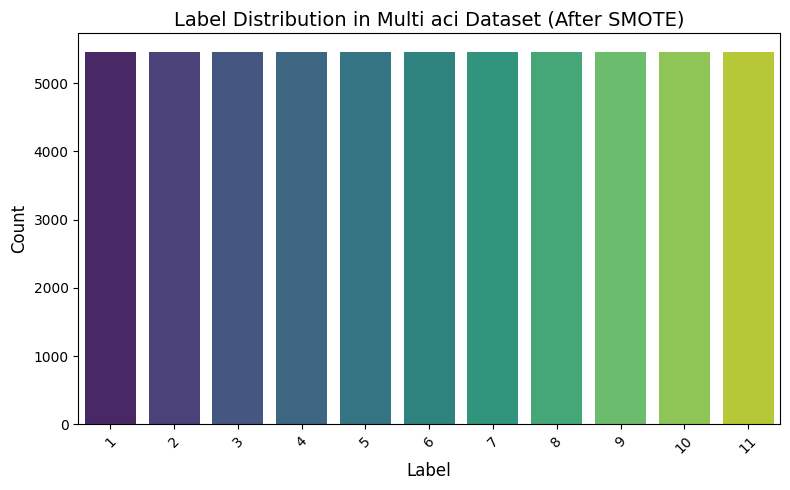

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Label Distribution in Multi aci Dataset (After SMOTE)", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()

# Save the figure
plt.savefig('multi_aci_label_distribution_after_smote.png', dpi=800)

# Show plot
plt.show()


# **Filtering mechanism**

# Correlation-Based Filtering

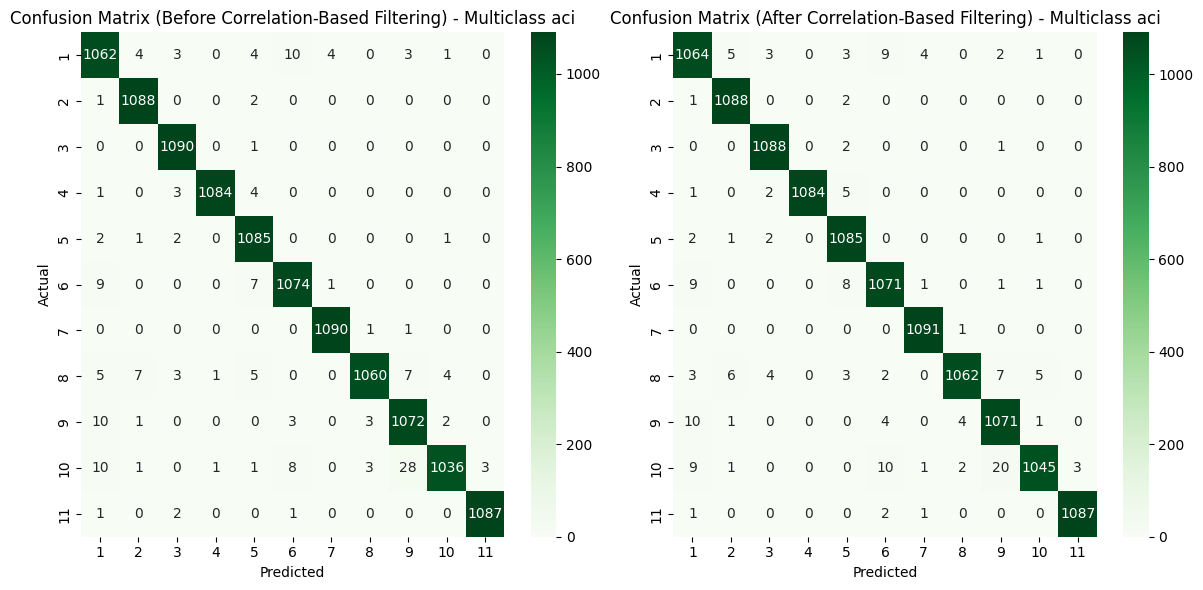

<Figure size 800x600 with 0 Axes>

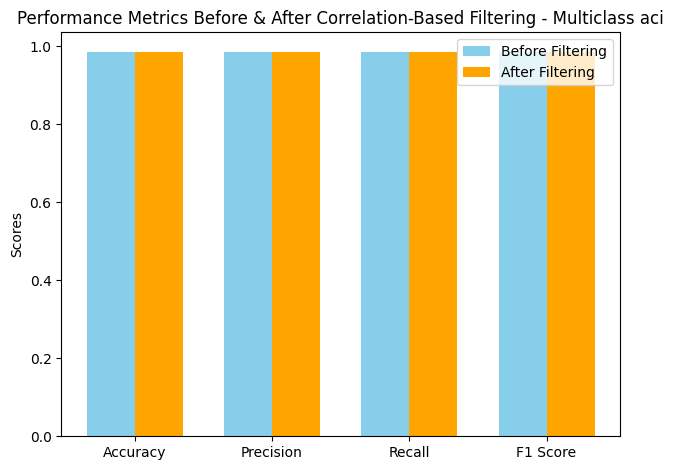

Before Filtering - Accuracy: 0.9853, Precision: 0.9854, Recall: 0.9853, F1 Score: 0.9853
After Filtering - Accuracy: 0.9860, Precision: 0.9861, Recall: 0.9860, F1 Score: 0.9860


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize dictionary to store classification results
classification_results = {}

# --- Load dataset ---
df = pd.read_csv("/content/bal_multi_aci.csv") 

# Check dataset is multiclass
assert df['Label'].nunique() > 2, "Error: Dataset is not multiclass!"

# Define features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Copy original feature names
original_feature_names = X.columns.tolist()

# --- Correlation-based Filtering ---
correlation_threshold = 0.9
correlation_matrix = X.corr()

# Identify highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
drop_columns = [col for col in upper_triangle.columns if any(upper_triangle[col].abs() > correlation_threshold)]

# Create filtered dataset but keep feature names intact
X_filtered = X.copy()
X_filtered.loc[:, drop_columns] = 0

# Ensure feature names are unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtcorr_multiclass_aci.csv", index=False)

# --- Train-Test Split ---
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# --- Train Random Forest Classifier ---
clf = RandomForestClassifier(random_state=42)

# Train and predict before filtering
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict after filtering
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# --- Compute Metrics (Weighted Averaging) ---
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='weighted')
recall_before = recall_score(y_test_before, y_pred_before, average='weighted')
f1_before = f1_score(y_test_before, y_pred_before, average='weighted')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='weighted')
recall_after = recall_score(y_test_after, y_pred_after, average='weighted')
f1_after = f1_score(y_test_after, y_pred_after, average='weighted')

# --- Confusion Matrices ---
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Labels for multiclass classification
multiclass_labels = [str(label) for label in np.unique(y)]

# --- Plot Confusion Matrices ---
plt.figure(figsize=(12, 6))

# Before filtering
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=multiclass_labels, yticklabels=multiclass_labels)
plt.title('Confusion Matrix (Before Correlation-Based Filtering) - Multiclass aci')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# After filtering
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=multiclass_labels, yticklabels=multiclass_labels)
plt.title('Confusion Matrix (After Correlation-Based Filtering) - Multiclass aci')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_multiclass_aci_correlation_filtering.png", dpi=800)
plt.show()

# --- Performance Comparison Graph ---
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Correlation-Based Filtering - Multiclass aci')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_multiclass_aci_correlation_filtering.png", dpi=800)
plt.show()

# --- Store and Print Classification Results ---
classification_results['Correlation-Based Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# Variance threshold filtering

Number of features before filtering: 79
Number of features after filtering: 71


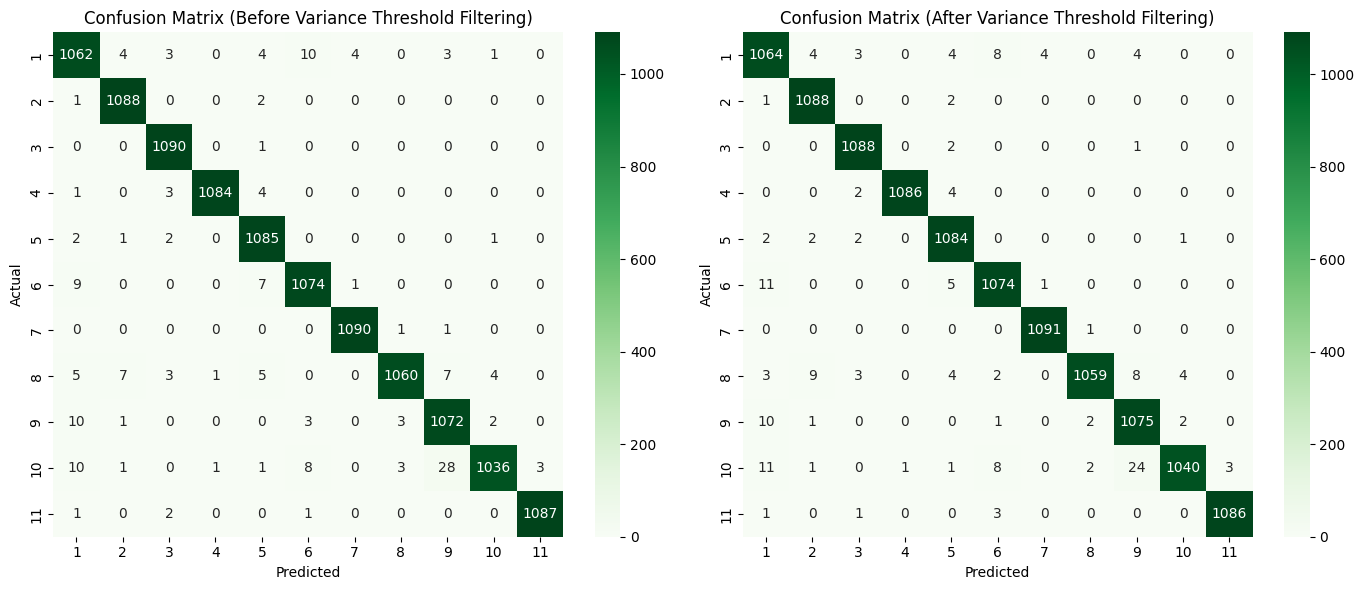

<Figure size 800x600 with 0 Axes>

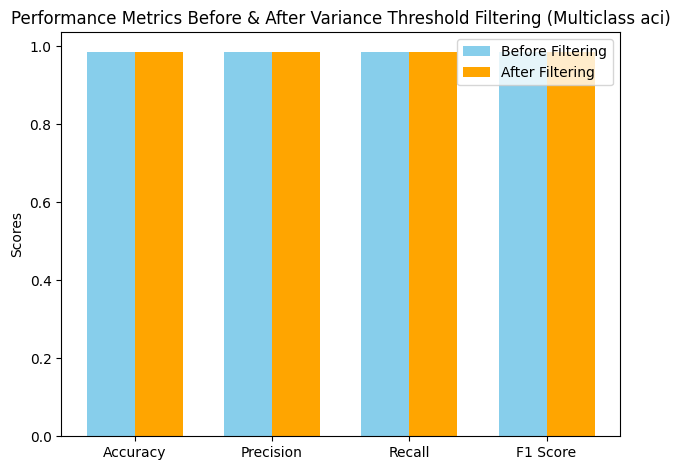


Before Filtering - Accuracy: 0.9853, Precision: 0.9854, Recall: 0.9853, F1 Score: 0.9853
After Filtering - Accuracy: 0.9859, Precision: 0.9860, Recall: 0.9859, F1 Score: 0.9859


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

# Load dataset
df = pd.read_csv("/content/bal_multi_aci.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Label'])  # Features
y = df['Label']

# Variance Threshold Filtering
variance_threshold = 0.01  # Set the threshold for variance
selector = VarianceThreshold(threshold=variance_threshold)
X_after = selector.fit_transform(X)
X_filtered = pd.DataFrame(X_after, columns=X.columns[selector.get_support()])

# Show number of features before and after filtering
print(f"Number of features before filtering: {X.shape[1]}")
print(f"Number of features after filtering: {X_filtered.shape[1]}")

# Save filtered dataset
filtered_df = pd.concat([X_filtered, y], axis=1)
filtered_df.to_csv("/content/varthresh_multiclass_aci.csv", index=False)

# Train-test split
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train and predict before filtering
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict after filtering
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics (macro for multiclass)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

# Confusion matrices
labels = sorted(np.unique(y))  # Ensure labels start properly (not from 0 if that's the dataset)
cm_before = confusion_matrix(y_test_before, y_pred_before, labels=labels)
cm_after = confusion_matrix(y_test_after, y_pred_after, labels=labels)

# Label names for plots
class_labels = [str(label) for label in labels]

# Plot Confusion Matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Before Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (After Variance Threshold Filtering)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save the confusion matrix figure
plt.savefig("/content/confusion_matrix_multiclass_aci_varthresh.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Variance Threshold Filtering (Multiclass aci)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()

# Save the performance comparison figure
plt.savefig("/content/performance_comparison_multiclass_aci_varthresh.png", dpi=800)
plt.show()

# Store classification results


classification_results['Variance Threshold Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Print Results
print(f"\nBefore Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# mutual information based filtering

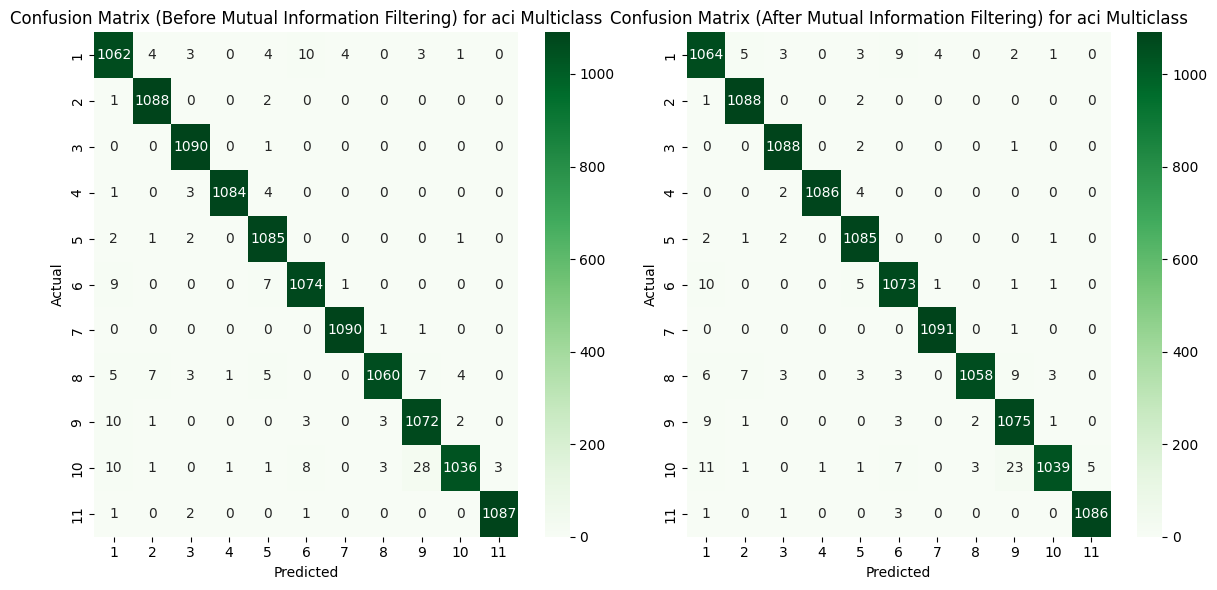

<Figure size 800x600 with 0 Axes>

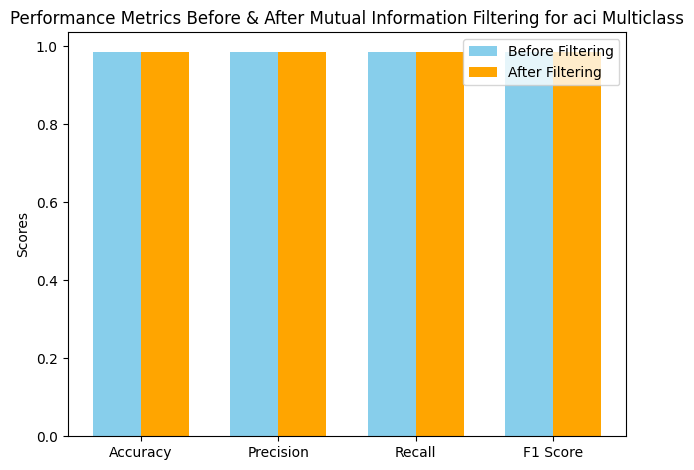

Before Filtering - Accuracy: 0.9853, Precision: 0.9854, Recall: 0.9853, F1 Score: 0.9853
After Filtering - Accuracy: 0.9858, Precision: 0.9859, Recall: 0.9858, F1 Score: 0.9857


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/bal_multi_aci.csv")  

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Ensure labels don't start with 0 by adjusting them if necessary
unique_labels = np.unique(y)
label_offset = 1 - unique_labels.min()  # Offset to ensure labels start from 1
y = y + label_offset

# Copy original feature names
original_feature_names = X.columns.tolist()

# Mutual Information Filtering
mi = mutual_info_classif(X, y)
mi_threshold = 0.01
selected_features = X.columns[mi > mi_threshold]

# Create filtered dataset but keep feature names intact (set dropped features to 0)
X_filtered = X.copy()
X_filtered.loc[:, ~X_filtered.columns.isin(selected_features)] = 0

# Ensure feature names remain unchanged
assert list(X_filtered.columns) == original_feature_names, "Feature names have changed!"

# Save dataset after filtering
df_after_filtering = pd.concat([X_filtered, y], axis=1)
df_after_filtering.to_csv("filtmutualinfo_multiclass_aci.csv", index=False)

# Train-test split (stratify to maintain class balance)
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute metrics for multiclass classification
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='weighted')
recall_before = recall_score(y_test_before, y_pred_before, average='weighted')
f1_before = f1_score(y_test_before, y_pred_before, average='weighted')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='weighted')
recall_after = recall_score(y_test_after, y_pred_after, average='weighted')
f1_after = f1_score(y_test_after, y_pred_after, average='weighted')

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels + label_offset, yticklabels=unique_labels + label_offset)
plt.title('Confusion Matrix (Before Mutual Information Filtering) for aci Multiclass')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=unique_labels + label_offset, yticklabels=unique_labels + label_offset)
plt.title('Confusion Matrix (After Mutual Information Filtering) for aci Multiclass')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()

# Save confusion matrix figure
plt.savefig("confusion_matrix_multiclass_aci_mutual_info_filtering.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After Mutual Information Filtering for aci Multiclass')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()

# Save performance comparison figure
plt.savefig("performance_comparison_multiclass_aci_mutual_info_filtering.png", dpi=800)
plt.show()

# Store classification results

classification_results['Mutual Information Filtering'] = {
    'Accuracy Before': accuracy_before,
    'Precision Before': precision_before,
    'Recall Before': recall_before,
    'F1 Score Before': f1_before,
    'Accuracy After': accuracy_after,
    'Precision After': precision_after,
    'Recall After': recall_after,
    'F1 Score After': f1_after
}

# Display results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# comparison

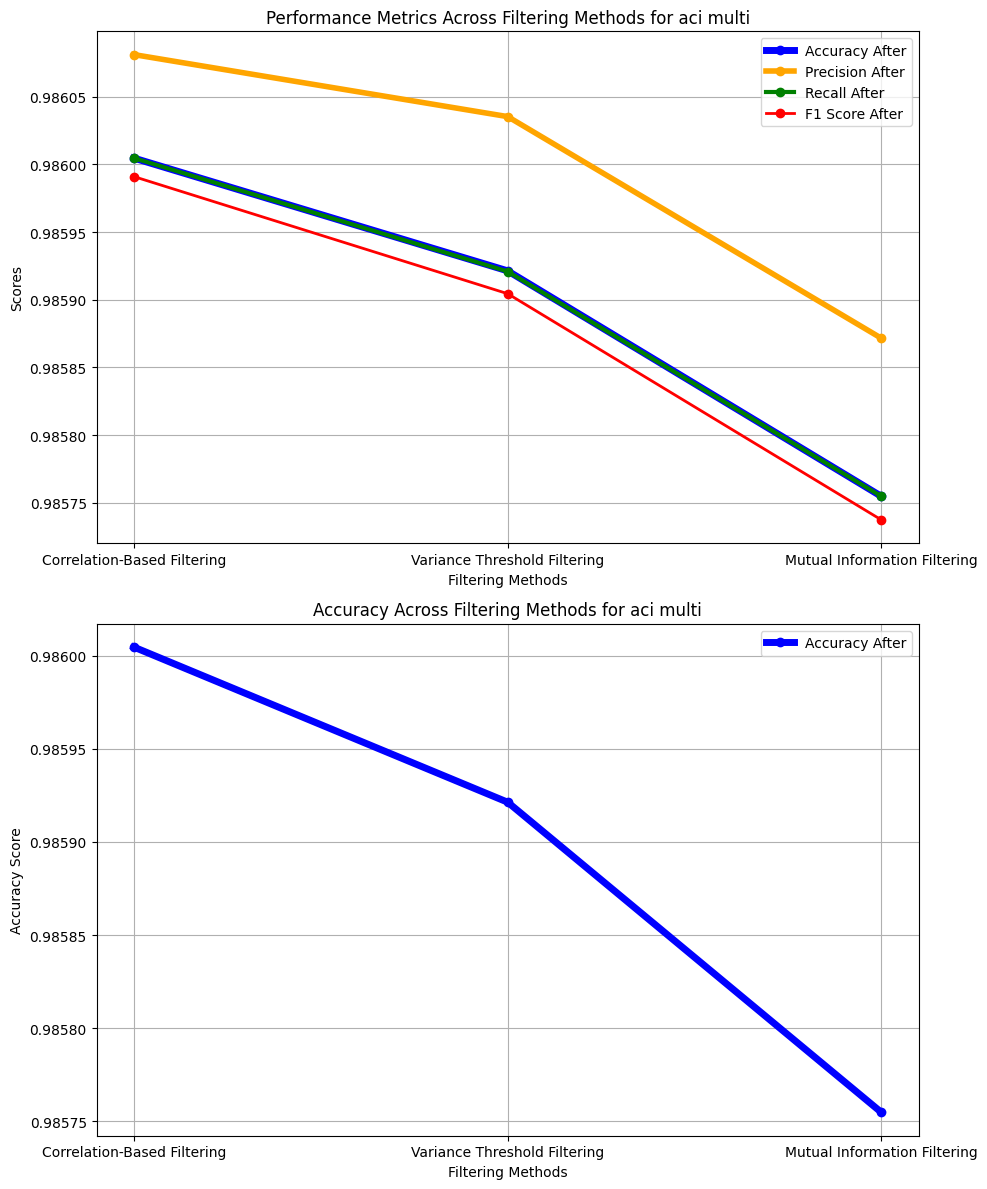

In [36]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy After', 'Precision After', 'Recall After', 'F1 Score After']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results
for method in classification_results:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results[method][metric])

# Set distinct colors manually
colors = {
    'Accuracy After': 'blue',
    'Precision After': 'orange',
    'Recall After': 'green',
    'F1 Score After': 'red'
}

# Set line widths manually (thicker first)
line_widths = {
    'Accuracy After': 5,
    'Precision After': 4,
    'Recall After': 3,
    'F1 Score After': 2
}

# Create a figure with 2 subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# =========================
# First Plot: All Metrics
# =========================
for metric in sorted(metrics_names, key=lambda x: -line_widths[x]):
    axs[0].plot(
        list(classification_results.keys()),
        metrics_values[metric],
        label=metric,
        marker='o',
        linewidth=line_widths[metric],
        color=colors[metric]
    )

axs[0].set_xlabel('Filtering Methods')
axs[0].set_ylabel('Scores')
axs[0].set_title('Performance Metrics Across Filtering Methods for aci multi')
axs[0].legend()
axs[0].grid(True)

# =========================
# Second Plot: Accuracy Only
# =========================
axs[1].plot(
    list(classification_results.keys()),
    metrics_values['Accuracy After'],
    label='Accuracy After',
    marker='o',
    linewidth=5,
    color='blue'
)

axs[1].set_xlabel('Filtering Methods')
axs[1].set_ylabel('Accuracy Score')
axs[1].set_title('Accuracy Across Filtering Methods for aci multi')
axs[1].legend()
axs[1].grid(True)

# Layout adjustment
plt.tight_layout()

# Save the whole figure
plt.savefig('performance_metrics_multi_aci_filtering_with_accuracy.png', dpi=800)

# Show the plots
plt.show()


# **univariate feature selction**

# select K best

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6 10 11 15 19 20 22 23 25 26 27 28 30 31 33 35 36 37 38 43 48 49
 50 51 52 54 55 56 57 58 59 60 61 63 64 65 69 74 75 77 78] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Number of features before feature selection: 79
Number of features after feature selection (SelectKBest): 30


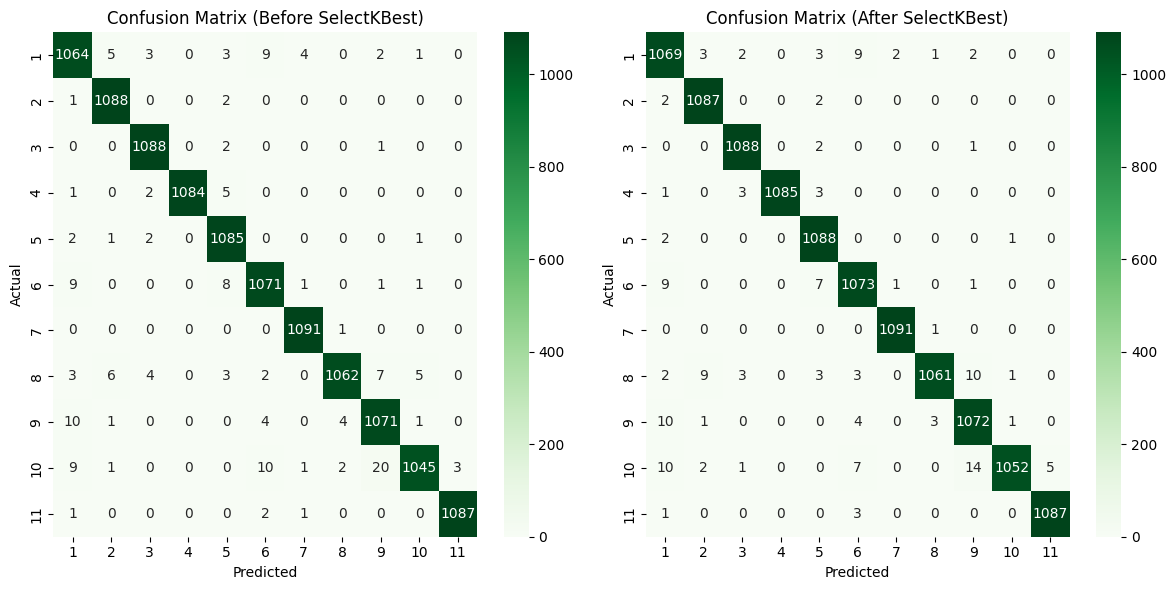

<Figure size 800x600 with 0 Axes>

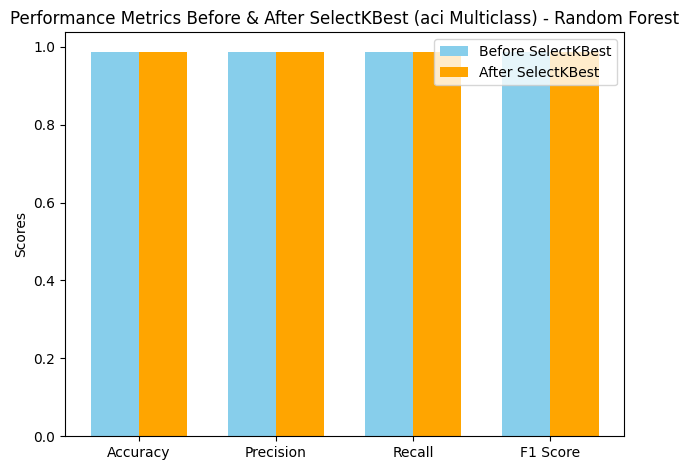

Before Filtering - Accuracy: 0.9860, Precision: 0.9861, Recall: 0.9860, F1 Score: 0.9860
After Filtering - Accuracy: 0.9874, Precision: 0.9875, Recall: 0.9874, F1 Score: 0.9874


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store classification results after filtering for later comparison
classification_results1 = {}

# Load dataset
df = pd.read_csv("filtcorr_multiclass_aci.csv")  # Update with your file path

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# SelectKBest Feature Selection
k = 30  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_after = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Show the number of features before and after
print(f"Number of features before feature selection: {X_before.shape[1]}")
print(f"Number of features after feature selection (SelectKBest): {X_after.shape[1]}")

# Create a new dataset after filtering
X_after_df = pd.DataFrame(X_after, columns=selected_features)
df_after_filtering = pd.concat([X_after_df, y], axis=1)

df_after_filtering.to_csv("multi_featk_aci.csv", index=False)

# Split the dataset
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier (Random Forest)
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Training on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Training on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

classification_results1['SelectKBest'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Before SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (After SelectKBest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrix_aci_multiclass_selectkbest_rf.png", dpi=800)
plt.show()

# Performance Comparison Graph
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
x = np.arange(len(metrics_names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2, metrics_before, width, label='Before SelectKBest', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After SelectKBest', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Before & After SelectKBest (aci Multiclass) - Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_aci_multiclass_selectkbest_rf.png", dpi=800)
plt.show()

# Display results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# mutual information

Number of features before filtering: 79
Number of features after filtering (Mutual Information): 30


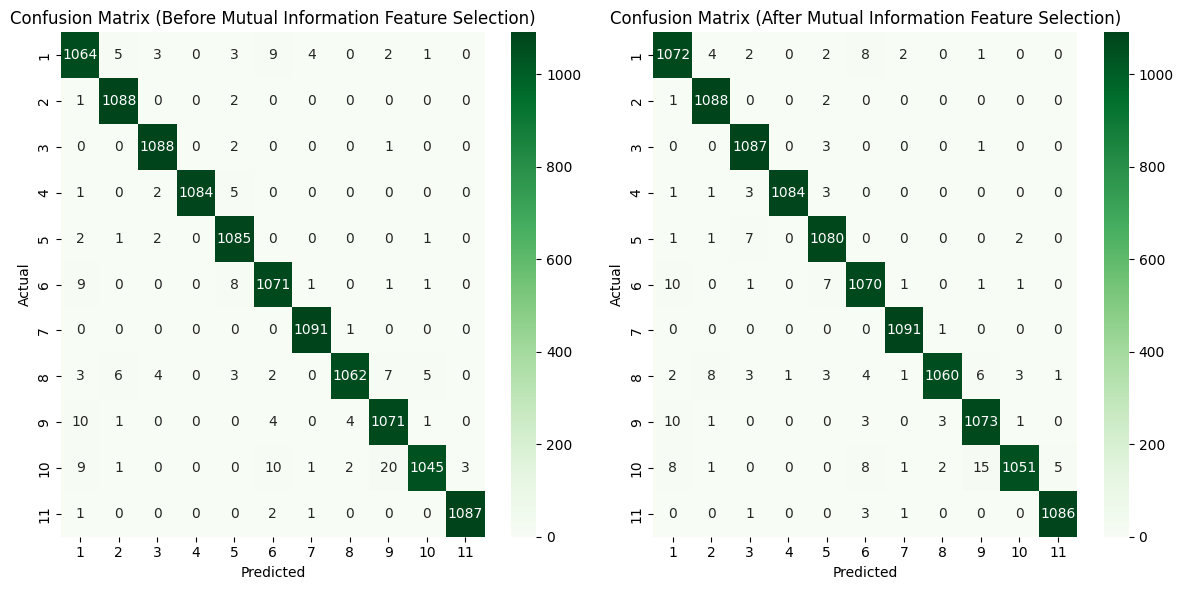

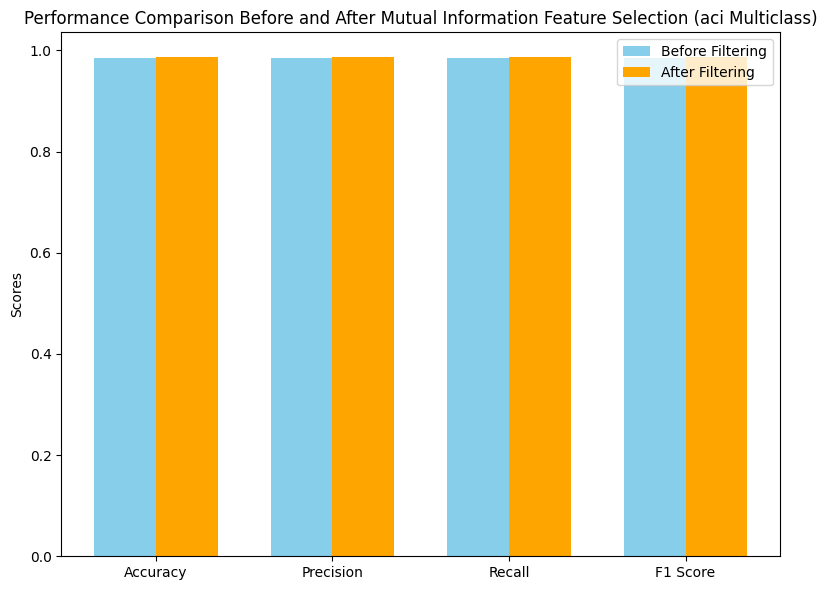

Before Filtering - Accuracy: 0.9860, Precision: 0.9861, Recall: 0.9860, F1 Score: 0.9860
After Filtering - Accuracy: 0.9865, Precision: 0.9866, Recall: 0.9865, F1 Score: 0.9865


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed to Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv("filtcorr_multiclass_aci.csv")  

# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

# Create the original dataset (before filtering)
X_before = X.copy()
y_before = y.copy()

# Compute Mutual Information between features and target
mutual_info_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame to store features and MI scores
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info_scores
}).sort_values(by='Mutual Information', ascending=False)

# Select top 'k' features
k = 30
top_k_features = mutual_info_df['Feature'].head(k).values
X_after = X[top_k_features]

# Show number of features
print(f"Number of features before filtering: {X_before.shape[1]}")
print(f"Number of features after filtering (Mutual Information): {X_after.shape[1]}")

# Save filtered dataset
df_after_filtering = pd.concat([X_after, y], axis=1)
df_after_filtering.to_csv("multi_featm_aci.csv", index=False)

# Split datasets
X_train_before, X_test_before, y_train_before, y_test_before = train_test_split(
    X_before, y_before, test_size=0.2, random_state=42, stratify=y)
X_train_after, X_test_after, y_train_after, y_test_after = train_test_split(
    X_after, y_before, test_size=0.2, random_state=42, stratify=y)

# Train classifier (RandomForestClassifier)
clf = RandomForestClassifier(random_state=42)

# Train and predict on unfiltered data
clf.fit(X_train_before, y_train_before)
y_pred_before = clf.predict(X_test_before)

# Train and predict on filtered data
clf.fit(X_train_after, y_train_after)
y_pred_after = clf.predict(X_test_after)

# Compute performance metrics for multiclass (average='macro' for macro-average metrics)
accuracy_before = accuracy_score(y_test_before, y_pred_before)
precision_before = precision_score(y_test_before, y_pred_before, average='macro')
recall_before = recall_score(y_test_before, y_pred_before, average='macro')
f1_before = f1_score(y_test_before, y_pred_before, average='macro')

accuracy_after = accuracy_score(y_test_after, y_pred_after)
precision_after = precision_score(y_test_after, y_pred_after, average='macro')
recall_after = recall_score(y_test_after, y_pred_after, average='macro')
f1_after = f1_score(y_test_after, y_pred_after, average='macro')

# Store results
classification_results1['Mutual Information'] = {
    'Accuracy': accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after
}

# Confusion matrices (for multiclass labels)
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after = confusion_matrix(y_test_after, y_pred_after)

# Plot confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Before Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (After Mutual Information Feature Selection)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.savefig("confusion_matrices_aci_multiclass_mutual_information.png", dpi=800)
plt.show()

# Plot performance comparison
metrics_before = [accuracy_before, precision_before, recall_before, f1_before]
metrics_after = [accuracy_after, precision_after, recall_after, f1_after]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, metrics_before, width, label='Before Filtering', color='skyblue')
ax.bar(x + width/2, metrics_after, width, label='After Filtering', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison Before and After Mutual Information Feature Selection (aci Multiclass)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.tight_layout()
plt.savefig("performance_comparison_aci_multiclass_mutual_information.png", dpi=800)
plt.show()

# Print results
print(f"Before Filtering - Accuracy: {accuracy_before:.4f}, Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1 Score: {f1_before:.4f}")
print(f"After Filtering - Accuracy: {accuracy_after:.4f}, Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1 Score: {f1_after:.4f}")


# comparison

In [43]:
classification_results1

{'SelectKBest': {'Accuracy': 0.9874208597134289,
  'Precision': 0.9875193025011303,
  'Recall': 0.9874206911328817,
  'F1 Score': 0.9874157595533858},
 'Mutual Information': {'Accuracy': 0.9865044985004998,
  'Precision': 0.9865756132816845,
  'Recall': 0.9865042534611738,
  'F1 Score': 0.9864919918416158}}

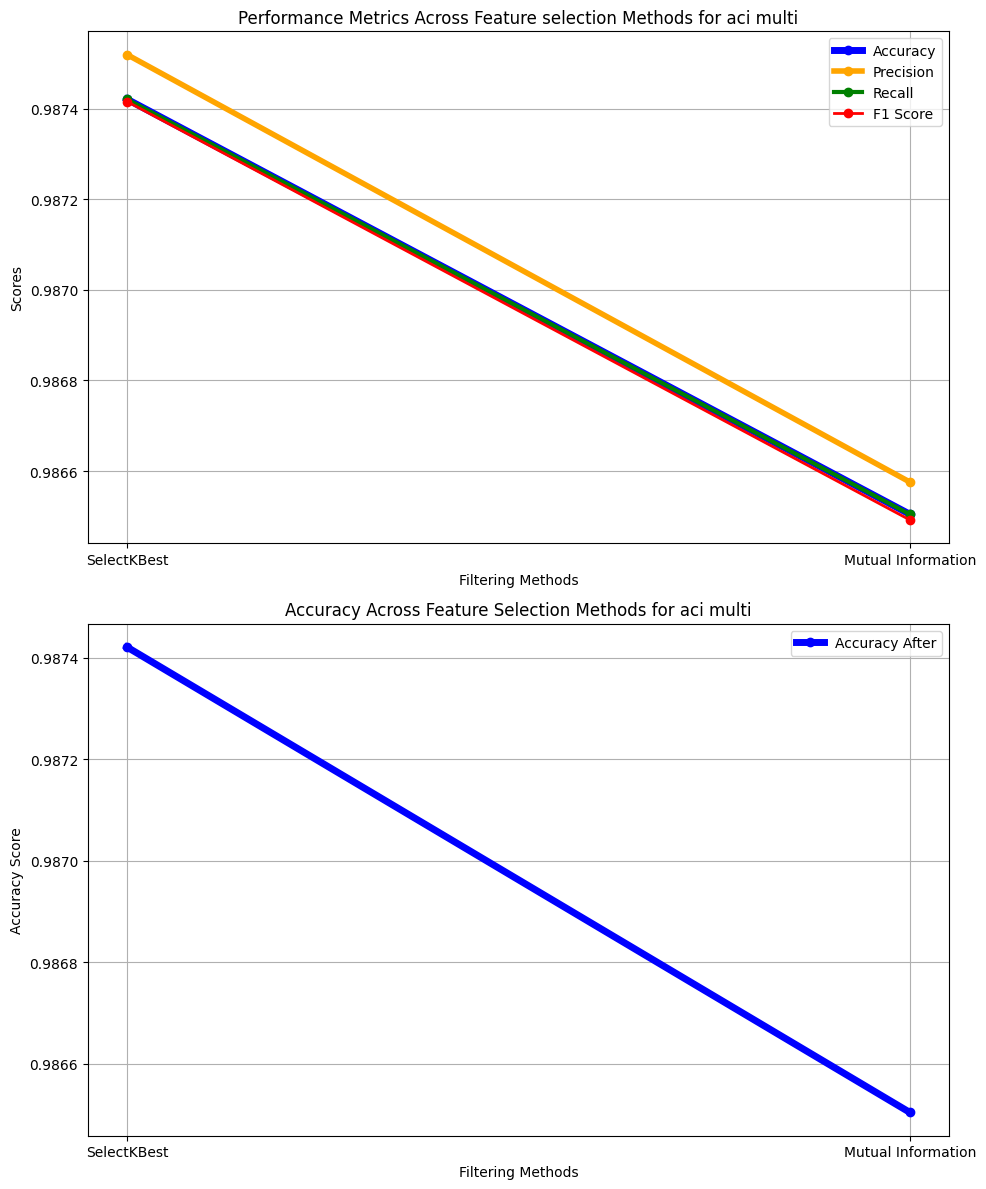

In [44]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create an empty dictionary to hold the metric values for each filtering method
metrics_values = {metric: [] for metric in metrics_names}

# Populate the dictionary with the values from classification_results
for method in classification_results1:
    for metric in metrics_names:
        metrics_values[metric].append(classification_results1[method][metric])

# Set distinct colors manually
colors = {
    'Accuracy': 'blue',
    'Precision': 'orange',
    'Recall': 'green',
    'F1 Score': 'red'
}

# Set line widths manually (thicker first)
line_widths = {
    'Accuracy': 5,
    'Precision': 4,
    'Recall': 3,
    'F1 Score': 2
}

# Create a figure with 2 subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# =========================
# First Plot: All Metrics
# =========================
# Change the x-axis data to use classification_results1.keys() instead of classification_results.keys()
for metric in sorted(metrics_names, key=lambda x: -line_widths[x]):
    axs[0].plot(
        list(classification_results1.keys()),  # Corrected line
        metrics_values[metric],
        label=metric,
        marker='o',
        linewidth=line_widths[metric],
        color=colors[metric]
    )

axs[0].set_xlabel('Filtering Methods')
axs[0].set_ylabel('Scores')
axs[0].set_title('Performance Metrics Across Feature selection Methods for aci multi')
axs[0].legend()
axs[0].grid(True)

# =========================
# Second Plot: Accuracy Only
# =========================
axs[1].plot(
    list(classification_results1.keys()),
    metrics_values['Accuracy'],
    label='Accuracy After',
    marker='o',
    linewidth=5,
    color='blue'
)

axs[1].set_xlabel('Filtering Methods')
axs[1].set_ylabel('Accuracy Score')
axs[1].set_title('Accuracy Across Feature Selection Methods for aci multi')
axs[1].legend()
axs[1].grid(True)

# Layout adjustment
plt.tight_layout()

# Save the whole figure
plt.savefig('performance_metrics_multi_aci_featureselection_with_accuracy.png', dpi=800)

# Show the plots
plt.show()
